In [1]:
import scipy.signal as signal
import numpy.fft as fft
import numpy as np
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

## Compute output of LTI system by convolution

$x[n] = \sum_{k=0}^9 k \cdot \delta[n-k]$

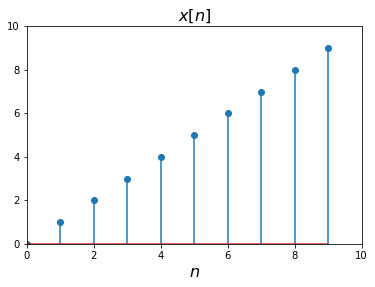

In [3]:
x1 = range(10)

plt.stem(x1)
plt.title('$x[n]$',fontsize=16)
plt.xlabel('$n$',fontsize=16)
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()

### Convolve $x[n]$ with $h[n] = x[-n]$ by convolution in time

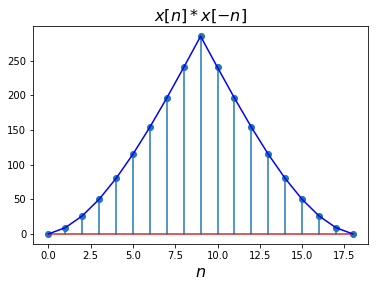

In [4]:
xrev1 = x1[::-1]
y1 = signal.convolve(x1,xrev1)
plt.figure()
plt.stem(y1)
plt.plot(y1,'b');
plt.title('$x[n]*x[-n]$',fontsize=16);
plt.xlabel('$n$',fontsize=16);

## Compute output using convolution property in frequency and FFT

Before computing the convolution with the DFT (FFT), you must zero-pad the two signals so that they are the same length as the result of their convolution in time. In this case, $2N-1$ samples!

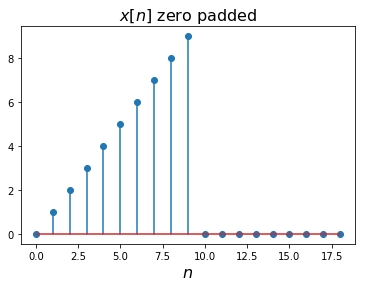

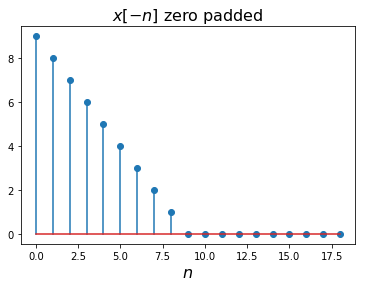

In [5]:
x2 = np.zeros(19)
x2[0:10] = x1
plt.figure()
plt.stem(x2);
plt.title('$x[n]$ zero padded',fontsize=16);
plt.xlabel('$n$',fontsize=16);


x2rev = np.zeros(19)
x2rev[0:10] = xrev1
plt.figure()
plt.stem(x2rev);
plt.title('$x[-n]$ zero padded',fontsize=16);
plt.xlabel('$n$',fontsize=16);

### Result of convolution using the FFT and inverse FFT

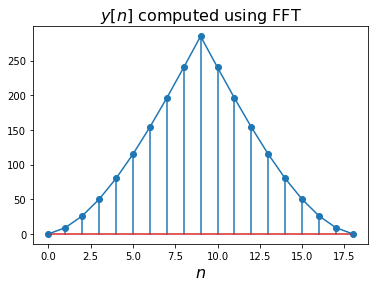

In [6]:
plt.figure()
yfft = fft.ifft(fft.fft(x2)*fft.fft(x2rev))
plt.stem(yfft.real)
plt.plot(yfft.real)
plt.xlabel('$n$',fontsize=16)
plt.title('$y[n]$ computed using FFT',fontsize=16)
plt.show()

## Implement a (moving average)

The moving average of length $N$ is a commmon operating in signal processing that, for a given discrete-time index $n$, computes the average of the past $N$  samples including the sample at $n$.

This operation can be expressed as $x[n] * h_N[n]$, where 

$$h_N[n] = \frac{1}{N} (u[n] - u[n-N-1])$$

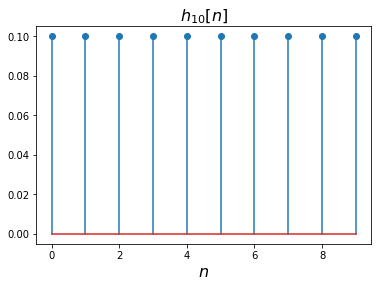

In [7]:
N = 10
h = (1./N)*np.ones(N)

plt.figure()
plt.stem(h);
plt.title('$h_{10}[n]$',fontsize=16);
plt.xlabel('$n$',fontsize=16)
plt.show()

### We will compute the moving average of a very basic signal

$$x[N] = u[n] - u[n-100]$$

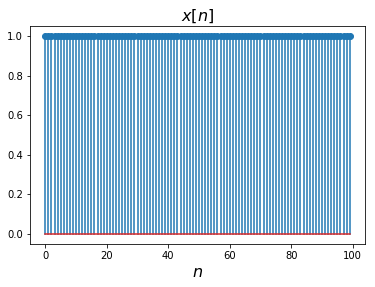

In [8]:
x = np.ones(100)
plt.figure()
plt.stem(x);
plt.title('$x[n]$',fontsize=16);
plt.xlabel('$n$',fontsize=16);

## First using convolution

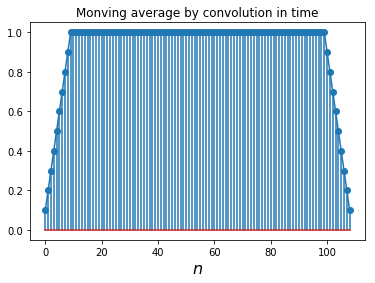

In [9]:
y = signal.convolve(h,x)
plt.figure()
plt.stem(y);
plt.plot(y);
plt.title('Monving average by convolution in time');
plt.xlabel('$n$',fontsize=16);

## Using FFT now

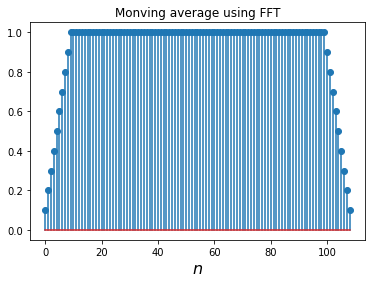

In [10]:
xzp = np.zeros(y.shape)
xzp[0:100] = x
hzp = np.zeros(y.shape)
hzp[0:N] = h
ymvfft = fft.ifft(fft.fft(xzp)*fft.fft(hzp));
plt.stem(ymvfft.real);

plt.title('Monving average using FFT');
plt.xlabel('$n$',fontsize=16);

## Decaying exponential convolved with itself

Let $x[n] = \alpha^n$ and $y[n] = x[n]*x[-n]$. We can compute $y[n]$ using the definition of convolution. Let us assume that $n \geq 0$:

$$y[n] = \sum_{k=n}^\infty \alpha^k \cdot \alpha^{k-n} \sum_{k'=0}^\infty \alpha^{k'+n}\cdot\alpha^{k'} = \alpha^n \cdot \frac{1}{1-\alpha^2}$$

$y[n] = y[-n]$, which means that $y[n]$ is even. Therefore,

$$y[n] = \frac{1}{1-\alpha^2}\cdot\alpha^{|n|}$$

### Generating the signal

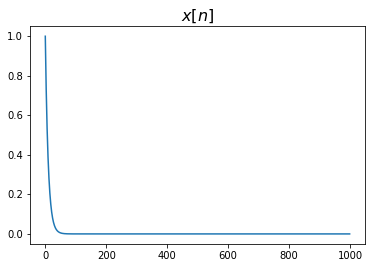

In [11]:
alpha = 0.9;
N = 1000
x3 =  (alpha*np.ones(N) ) ** range(N)
plt.figure();
plt.plot(x3);
plt.title('$x[n]$',fontsize=16);

### Convolution of signal with itself reversed

Note that this is a finite length convolution, i.e. for some large value of $N$

$$x_N[n] = \sum_{k=0}^N \alpha^k \delta[n-k]$$

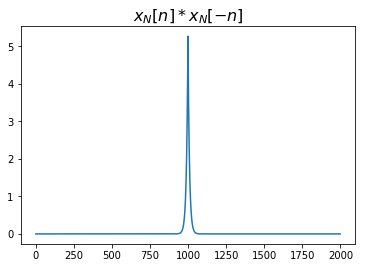

In [12]:
x3rev = x3[::-1]
plt.figure()
y3 = signal.convolve(x3,x3rev)
plt.plot(y3);
plt.title('$x_N[n]*x_N[-n]$',fontsize=16);

### Comparing with the ``truth''

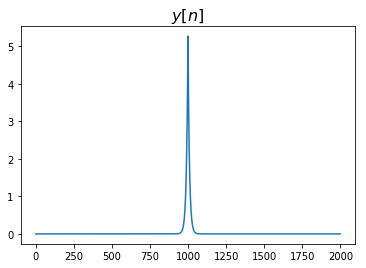

In [13]:
plt.figure()
k = np.arange(1999)
plt.plot((1/(1-alpha**2)) * ( (alpha)*np.ones(2*N-1) ) ** abs(k-999));
plt.title('$y[n]$',fontsize=16);